In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

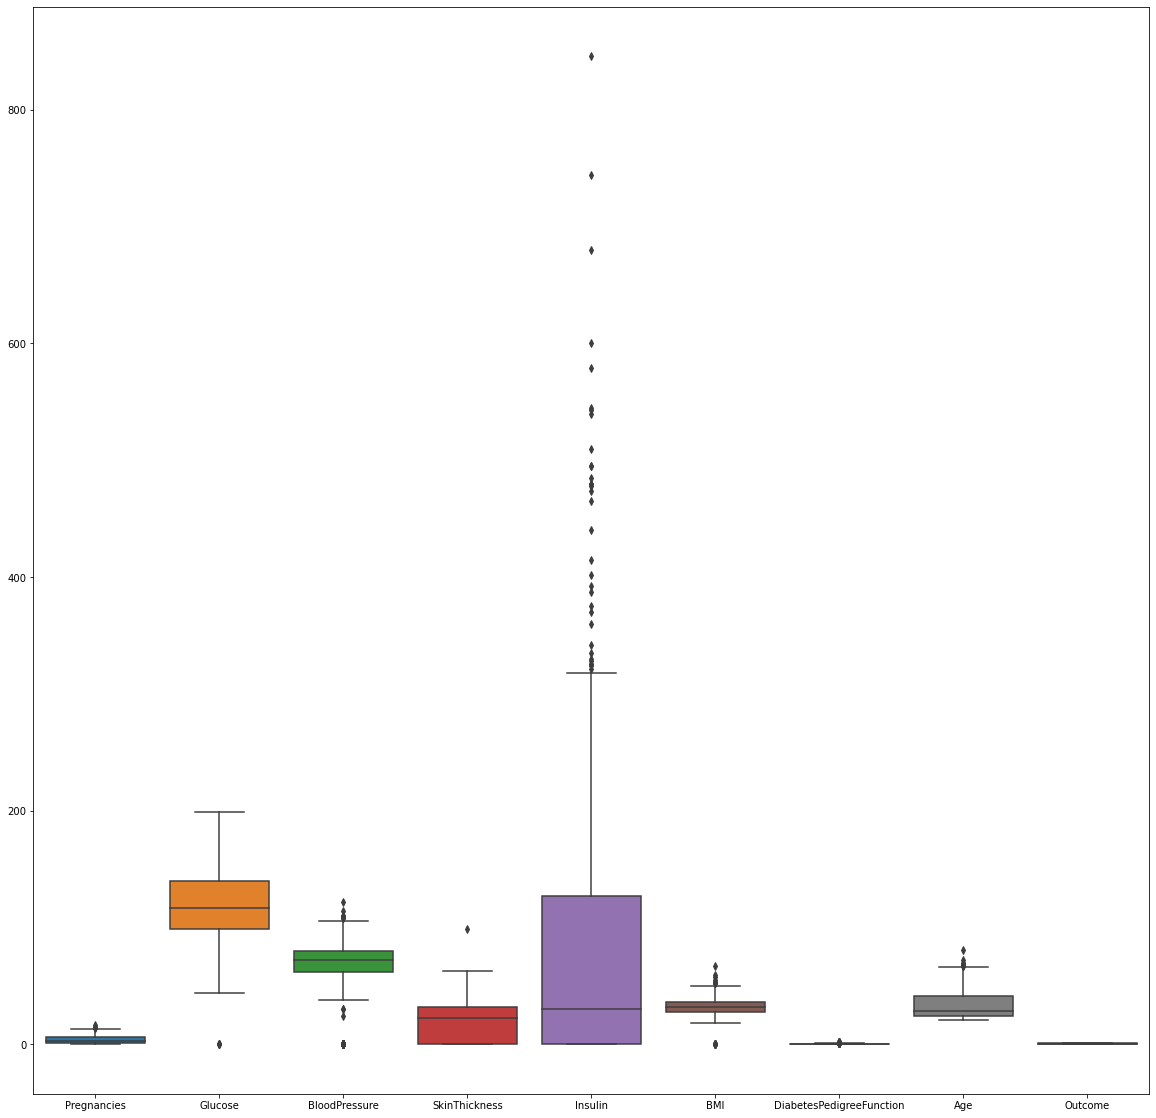

In [5]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)
plt.show()

In [6]:
# we are  able to the   number of the outliers in the insulin bmi  and bp pregnancies


In [9]:
#  we will  remove  the   outliers with  the help of the   quantile method  which    87  percentile   give the number of the 

q=df['Pregnancies'].quantile(0.98)
df_new=df[df['Pregnancies']<q]


q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]


In [10]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


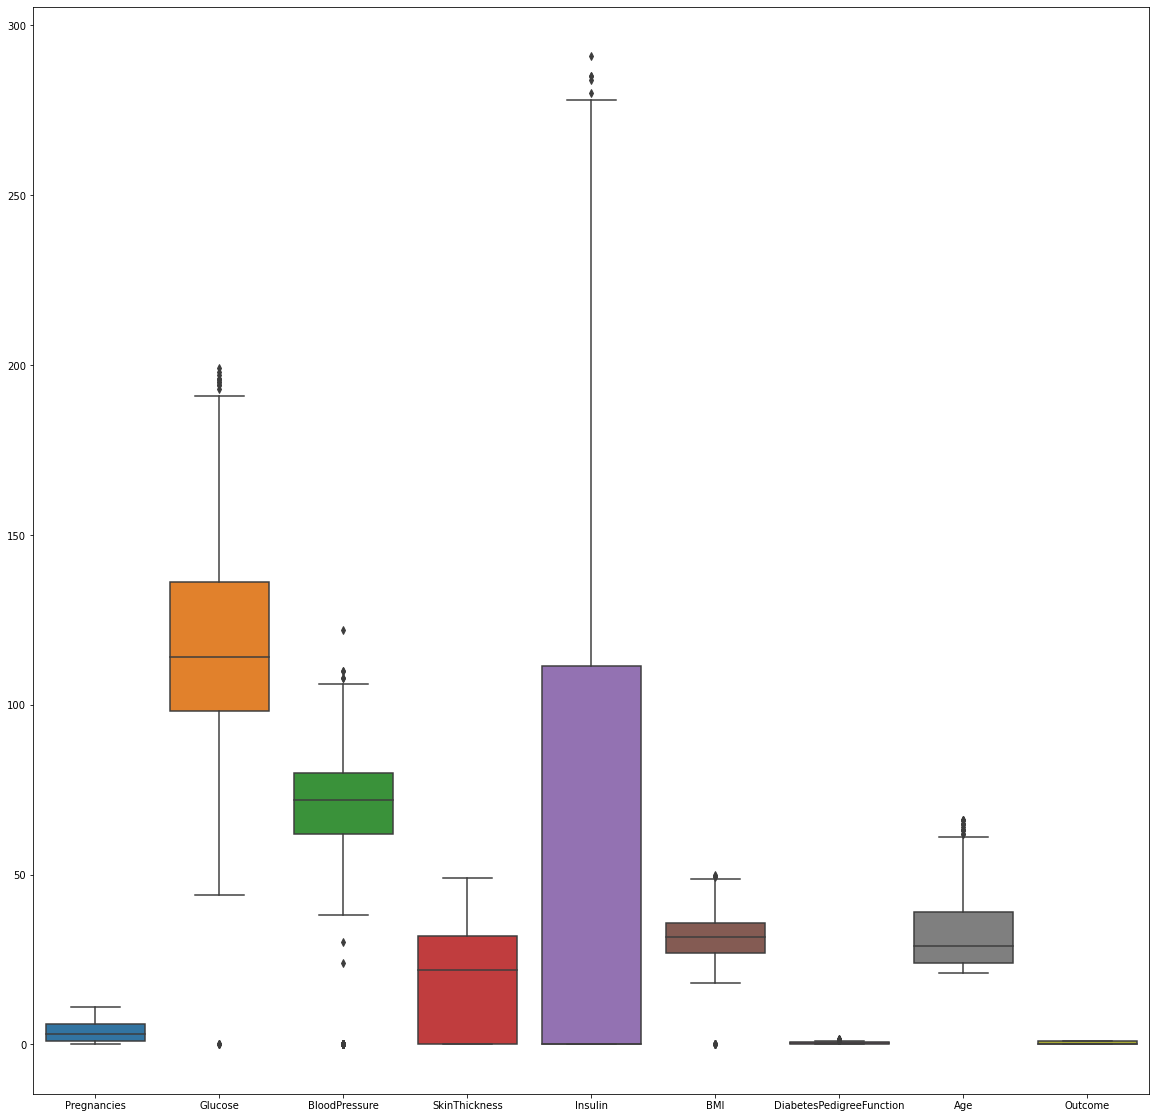

In [11]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)
plt.show()

In [12]:
y=df_new['Outcome']

In [13]:
X=df_new.drop(columns=['Outcome'])

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
# so now  we have to standardize the data
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(X)))
X_scaled = scalar.fit_transform(X)

<AxesSubplot:>

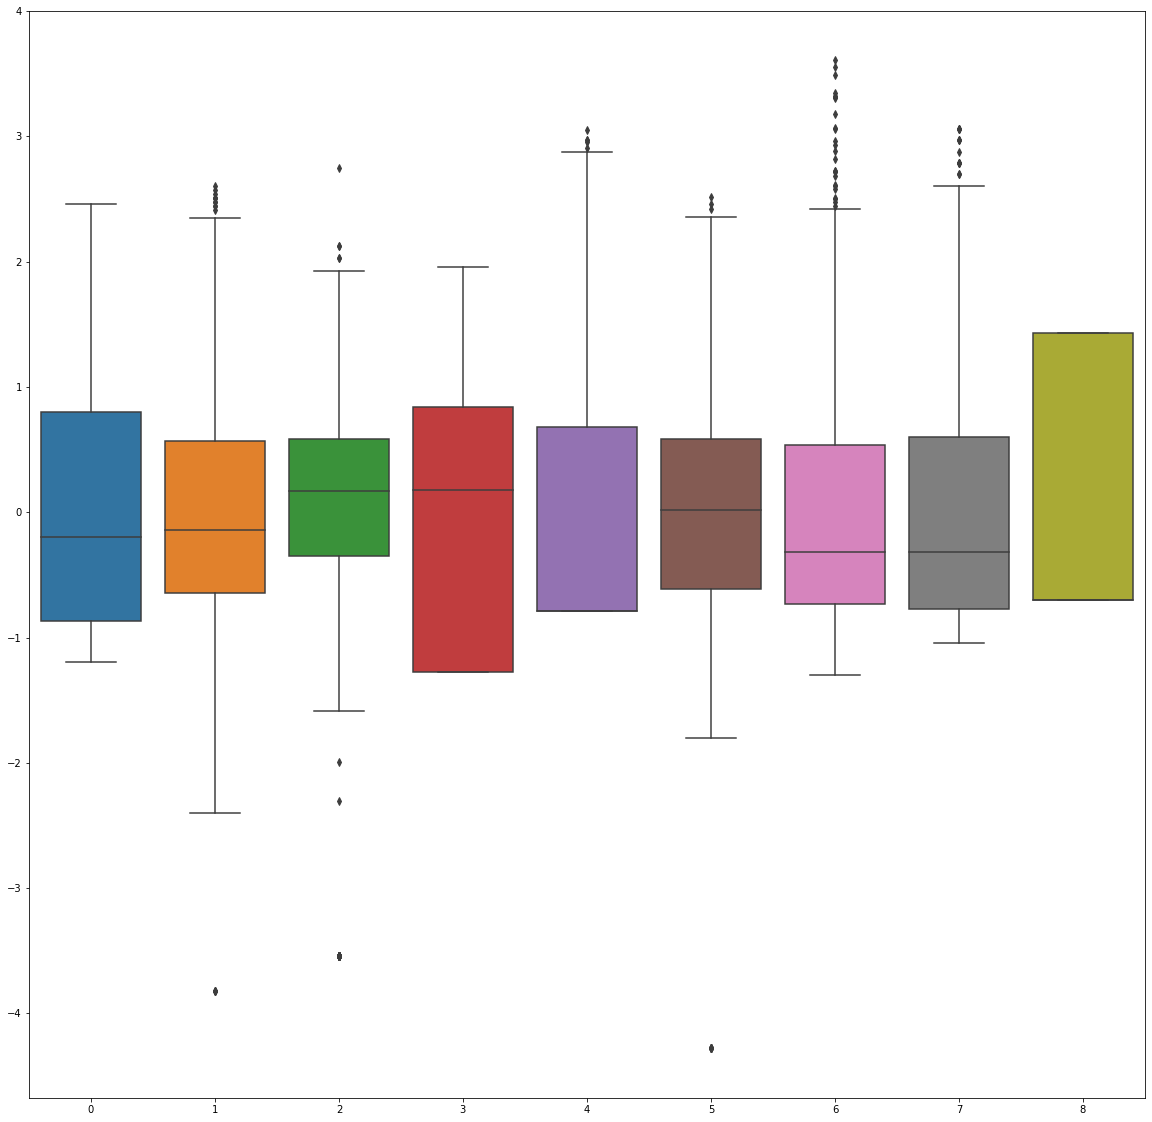

In [16]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=144)

In [21]:
logr=LogisticRegression(verbose=1,solver='liblinear')

In [22]:
logr.fit(x_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [24]:
logr.predict(x_test[[1]])

array([0], dtype=int64)

In [25]:
# now we will do  with   normal    without  any  solver of the  liblinear 
lr=LogisticRegression(verbose=1)

In [26]:
lr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [29]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [30]:
# so  now we have mmatch the  result of the  following 
confusion_matrix(y_test,y_pred)

array([[77, 10],
       [25, 23]], dtype=int64)

In [39]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred)


{'Accuracy': 0.7407407407407407,
 'Precision': 0.696969696969697,
 'Recall': 0.4791666666666667,
 'Specficity': 0.8850574712643678,
 'F1': 0.5679012345679013}

In [40]:
auc = roc_auc_score(y_test,y_pred)

In [41]:
roc_auc_score(y_test,y_pred)

0.6821120689655172